In [13]:
# data analysis and wrangling
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
# visualization

from sklearn.tree import export_graphviz
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.model_selection import KFold, StratifiedKFold, cross_validate, cross_val_predict
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import StandardScaler, MinMaxScaler

import graphviz

from IPython.display import Image
import sklearn.tree as tree
#import pydotplus

import warnings
warnings.filterwarnings('ignore')


# Titanic Database Overview

**First see the link:**
- <h> https://www.kaggle.com/c/titanic/data </h>


### Question and problem definition

Competition sites like Kaggle define the problem to solve or questions to ask while providing the datasets for training your data science model and testing the model results against a test dataset. The question or problem definition for Titanic Survival competition is [described here at Kaggle](https://www.kaggle.com/c/titanic).

> Knowing from a training set of samples listing passengers who survived or did not survive the Titanic disaster, can our model determine based on a given test dataset not containing the survival information, if these passengers in the test dataset survived or not.

We may also want to develop some early understanding about the domain of our problem. This is described on the [Kaggle competition description page here](https://www.kaggle.com/c/titanic). Here are the highlights to note.

- On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. Translated 32% survival rate.
- One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew.
- **Hypothesis**: Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.


# I. Acquire data

We start by acquiring the training and testing datasets into Pandas DataFrames. We also combine these datasets to run certain operations on both datasets together.

In [14]:
train_df = pd.read_csv('../../dataset/titanic/train.csv')
test_df = pd.read_csv('../../dataset/titanic/test.csv')

See visualization part

# II. Exploratory Data Analysis
See visualization part

# III. Let's build our first model

## One attribute model

In [15]:
X = train_df[['Fare']].copy()
y = train_df['Survived'].copy() # or df.Survived.values
y.count() #so we need no preprocessing

891

In [16]:
#First Step
model1 = DecisionTreeClassifier()

#Second step
model1.fit(X,y)

#Prediction
y_pred = model1.predict(X)

#Compute the accuracy of our model
print(round(np.sum(y==y_pred)/len(y)*100,2),"%")

80.36 %


In [17]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, y_pred, labels=[1, 0])

array([[199, 143],
       [ 32, 517]], dtype=int64)

In [18]:
tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
(tn, fp, fn, tp)

(517, 32, 143, 199)

In [19]:
from sklearn.metrics import accuracy_score
print(round(accuracy_score(y,y_pred)*100,2),"%")

80.36 %


The previous example is not realistic as there is no outcome (only train is used)

In [20]:
train_set = train_df[0:700].copy()
test_set = train_df[700:].copy()

print(train_set.shape,test_set.shape)

X_train = train_set[['Fare']]
y_train = train_set['Survived']

X_test = test_set[['Fare']]
y_test = test_set['Survived'] 

#First Step
dt_model = DecisionTreeClassifier()

#Second step
dt_model.fit(X_train,y_train)

#Prediction
pred_train = dt_model.predict(X_train)

pred_test = dt_model.predict(X_test)

#Prediction on the train
1 - np.sum(pred_train==y_train)/len(y_train)

#Prediction on the test
1 - np.sum(pred_test==y_test)/len(y_test)

print('Train Score (error) :',1-accuracy_score(y_train,pred_train),"or: ", 1-dt_model.score(X_train,y_train))
print('Test Score (error) :',1-accuracy_score(y_test,pred_test),"or: ", 1-dt_model.score(X_test,y_test))

#Visualization with graph : Step for installation
#1) https://graphviz.gitlab.io/_pages/Download/Download_windows.html
#2) conda install -c anaconda graphviz     or  conda install -c conda-forge python-graphviz 


# Different way to plot a tree

# https://mljar.com/blog/visualize-decision-tree/

#_ = tree.plot_tree(dt_model, 
#                class_names=['0','1'], # the target names.
#                feature_names=['Fare'], # the feature names.
#                filled=True, # Whether to fill in the boxes with colours.
#                rounded=True # Whether to round the corners of the boxes.
#               )

dot_data  = tree.export_graphviz(dt_model, out_file=None,  
                class_names=['0','1'], # the target names.
                feature_names=['Fare'], # the feature names.
                filled=True, # Whether to fill in the boxes with colours.
                rounded=True, # Whether to round the corners of the boxes.
                special_characters=True)



graph = graphviz.Source(dot_data, format="png") 

(700, 12) (191, 12)
Train Score (error) : 0.19428571428571428 or:  0.19428571428571428
Test Score (error) : 0.2722513089005235 or:  0.2722513089005235


In [21]:
graph.render("decision_tree_graphivz")

'decision_tree_graphivz.png'

So, our model is very bad!!!

## Cross Validation

In [22]:
from sklearn.model_selection import KFold, StratifiedKFold

data =  np.array( [[1,2,3,4,5],[8,5,2,1,5],[1,0,0,1,0]] ).transpose()
example_df =  pd.DataFrame(data, columns=['x1','x2','target'])
print(example_df.shape)
example_df.head(10)

(5, 3)


,x1,x2,target
0,1,8,1
1,2,5,0
2,3,2,0
3,4,1,1
4,5,5,0


In [23]:
example_df.describe()

,x1,x2,target
count,5.000000,5.000000,5.000000
mean,3.000000,4.200000,0.400000
std,1.581139,2.774887,0.547723
min,1.000000,1.000000,0.000000
25%,2.000000,2.000000,0.000000
50%,3.000000,5.000000,0.000000
75%,4.000000,5.000000,1.000000
max,5.000000,8.000000,1.000000


<AxesSubplot:>

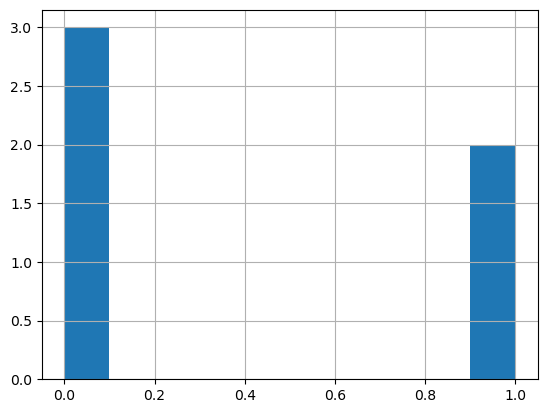

In [24]:
example_df.target.hist()

<AxesSubplot:>

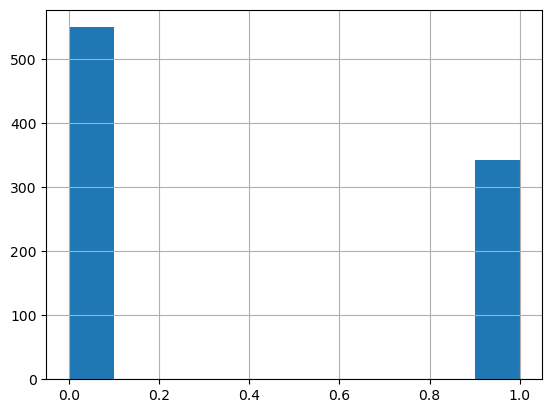

In [25]:
train_df.Survived.hist()

In [26]:
cv =  StratifiedKFold(n_splits=2,random_state=1680,shuffle=True)

In [27]:
example_df.head(10)

,x1,x2,target
0,1,8,1
1,2,5,0
2,3,2,0
3,4,1,1
4,5,5,0


In [29]:
y = example_df.target.values
X = example_df[['x1','x2']]
for (train_index, test_index) in cv.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)

TRAIN: [3 4] TEST: [0 1 2]
TRAIN: [0 1 2] TEST: [3 4]


In [30]:
example_df.loc[test_index]

,x1,x2,target
3,4,1,1
4,5,5,0


### Titanic problem

Assume that we add the Age attribute:
- The problem how to fill empty records of Age
- Solutions : 
    1. Remove rows whre ange = NAN : if enough data less then 5%, otherwise we will lose information
    2. Replace with zeor or mean : if normal distribution is then mean by sexe
    3. Find some records and replace with age value  from these records. 
    4. The best solution for decision tree: replace with a value does't exist like -1, -9, -99, -999

In [31]:
train_df = pd.read_csv('../../dataset/titanic/train.csv')
X = train_df[['Fare','SibSp','Parch','Age']].copy()
y = train_df['Survived'].copy()


# Preprocessing
X['Age'].fillna(-99,inplace=True)

#Cross-validation
cv = StratifiedKFold(n_splits=2,random_state=90,shuffle=True)

#Train 
for fold,(train_index, test_index) in enumerate(cv.split(X, y)):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index]
    
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]
    
    
    model = DecisionTreeClassifier()
    model.fit(X_train,y_train)
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    
    print ('Accuracy for Fold',fold,'*'*40,"\n")
    
    score = 1 - accuracy_score(y_train,pred_train)
    print("\t TRAIN error:", score,"\n")
    
    
    score = 1 - accuracy_score(y_test,pred_test)
    print("\t Test error:", score,"\n")

Accuracy for Fold 0 **************************************** 

	 TRAIN error: 0.038202247191011285 

	 Test error: 0.320627802690583 

Accuracy for Fold 1 **************************************** 

	 TRAIN error: 0.024663677130044803 

	 Test error: 0.33932584269662924 



In [33]:
#Evaluate metric(s) by cross-validation and also record fit/score times.
cv_dt = cross_validate(DecisionTreeClassifier(),X,y,scoring='accuracy',cv=5, n_jobs=-1, return_train_score=True)

In [34]:
cv_dt

{'fit_time': array([0.00628448, 0.00792313, 0.00762463, 0.00599933, 0.00599933]),
 'score_time': array([0.00264072, 0.        , 0.        , 0.        , 0.        ]),
 'test_score': array([0.68715084, 0.64606742, 0.65730337, 0.60674157, 0.62921348]),
 'train_score': array([0.96348315, 0.96213184, 0.95932679, 0.96213184, 0.95792426])}

In [35]:
print(cv_dt['test_score'].mean(), cv_dt['test_score'].std())


0.6452953361370912 0.026987740488442002


In [36]:
#Generate cross-validated estimates for each input data point

#The data is split according to the cv parameter. Each sample belongs
#to exactly one test set, and its prediction is computed with an
#estimator fitted on the corresponding training set.

cv_pred_dt = cross_val_predict(DecisionTreeClassifier(),X,y,cv=5, n_jobs=-1)
(cv_pred_dt==y).sum()/len(X)

0.6419753086419753

**Conclusion: when adding Age to the train, the accurancy is augmenting but not in the test : overfiting.** 

The problem can be: 
1. The model is too complex so we can change the depth or 
2. Age is not an important feature

Now, let's add the Sex attribute: a categorial attribue 

In [37]:
from sklearn.preprocessing import OrdinalEncoder

train_df = pd.read_csv('../../dataset/titanic/train.csv')
X = train_df[['Fare','SibSp','Parch','Sex']].copy()
y = train_df['Survived'].copy()

#Cross-validation
cv = StratifiedKFold(n_splits=5,random_state=90,shuffle=True)

# storing the training/testings results
results_df = pd.DataFrame(data=np.zeros((5,2)),columns=['Train_error', 'Test_error'])

#Train 
for fold,(train_index, test_index) in enumerate(cv.split(X, y)):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index]
    
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]
    
    
    model = DecisionTreeClassifier()
    model.fit(X_train,y_train)
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    print ('Accuracy for Fold',fold,'*'*40,"\n")
        
    score = 1 - accuracy_score(y_train,pred_train)
    results_df.loc[fold,'Train_error'] = round(score*100,2)
    print("\t TRAIN error:", score,"\n")

    
    score = 1 - accuracy_score(y_test,pred_test)
    results_df.loc[fold,'Test_error'] = round(score*100,2)
    print("\t TEST error:", score,"\n")

ValueError: could not convert string to float: 'male'

**What happened? Decision tree does not support categorical attributes?**

Decision tree models can handle categorical variables without encoding them. 
However, popular implementations of decision trees (and random forests) differ as to whether they honor this fact. 
Encoding can seriously degrade tree-model performance. 
* Single decision trees in CatBoost, H2O, and LightGBM can handle categorical variables without 
encoding but 
* scikit-learn and XGBoost can't.

In [38]:
test_df['Fare'].isna().sum()

1

In [39]:
train_df = pd.read_csv('../../dataset/titanic/train.csv')
X = train_df[['Fare','SibSp','Parch','Sex']].copy()
y = train_df['Survived'].copy()


'''
first solution for replacing catagorical values
'''
X.loc[ X['Sex']=='male', 'Sex' ] = 0
X.loc[ X['Sex']=='female', 'Sex'] = 1


#Cross-validation
cv = StratifiedKFold(n_splits=5,random_state=90,shuffle=True)

# storing the training/testings results
results_df = pd.DataFrame(data=np.zeros((5,2)),columns=['Train_error', 'Test_error'])

#Train 
for fold,(train_index, test_index) in enumerate(cv.split(X, y)):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index]
    
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]
    
    
    model = DecisionTreeClassifier()
    model.fit(X_train,y_train)
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    print ('Accuracy for Fold',fold,'*'*40,"\n")
        
    score = 1 - accuracy_score(y_train,pred_train)
    results_df.loc[fold,'Train_error'] = round(score*100,2)
    print("\t TRAIN error:", score,"\n")

    
    score = 1 - accuracy_score(y_test,pred_test)
    results_df.loc[fold,'Test_error'] = round(score*100,2)
    print("\t TEST error:", score,"\n")
    

Accuracy for Fold 0 **************************************** 

	 TRAIN error: 0.0786516853932584 

	 TEST error: 0.16759776536312854 

Accuracy for Fold 1 **************************************** 

	 TRAIN error: 0.06872370266479666 

	 TEST error: 0.2191011235955056 

Accuracy for Fold 2 **************************************** 

	 TRAIN error: 0.06872370266479666 

	 TEST error: 0.2191011235955056 

Accuracy for Fold 3 **************************************** 

	 TRAIN error: 0.07713884992987374 

	 TEST error: 0.2359550561797753 

Accuracy for Fold 4 **************************************** 

	 TRAIN error: 0.07713884992987374 

	 TEST error: 0.1910112359550562 



How to explain this behavior. Please read: 
    - https://scikit-learn.org/stable/modules/learning_curve.html

In [40]:
results_df.describe()

,Train_error,Test_error
count,5.00000,5.000000
mean,7.40600,20.656000
std,0.49364,2.711647
min,6.87000,16.760000
25%,6.87000,19.100000
50%,7.71000,21.910000
75%,7.71000,21.910000
max,7.87000,23.600000


In [41]:
results_df

,Train_error,Test_error
0,7.87,16.76
1,6.87,21.91
2,6.87,21.91
3,7.71,23.60
4,7.71,19.10


In [42]:
train_df = pd.read_csv('../../dataset/titanic/train.csv')
test_df = pd.read_csv('../../dataset/titanic/test.csv')

X = train_df[['Fare','SibSp','Parch','Sex']].copy()
sub = test_df[['Fare','SibSp','Parch','Sex']].copy()

y = train_df['Survived'].copy()

'''
The second method for encoding Sex attribute
'''

lb = OrdinalEncoder()
X['Sex'] = lb.fit_transform(X[['Sex']]).astype(int)
sub['Sex'] = lb.fit_transform(sub[['Sex']]).astype(int)

'''
Fill the nan in the test data : Fare
'''
sub['Fare'].fillna(value=sub["Fare"].mean(),inplace=True)


cv = StratifiedKFold(n_splits=5,random_state=10,shuffle=True)

results_df = pd.DataFrame()

#Train 
for fold,(train_index, test_index) in enumerate(cv.split(X, y)):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index]
    
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]
    
    
    model = DecisionTreeClassifier(max_depth=7, min_samples_leaf=2)
    model.fit( X_train,  y_train)
    
    pred_sub   = model.predict_proba(sub)[:,1]
    #pred_sub   = model.predict(sub)
   
    results_df['fold_'+str(fold)] = pred_sub
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    

In [43]:
results_df

,fold_0,fold_1,fold_2,fold_3,fold_4
0,0.166667,0.111111,0.147059,0.000000,0.171429
1,0.769231,0.722222,0.214286,0.500000,1.000000
2,0.115385,0.132075,0.134615,0.113636,0.077922
3,0.115385,0.132075,0.134615,0.113636,0.077922
4,0.956522,1.000000,0.214286,0.884615,0.680851
...,...,...,...,...,...
413,0.115385,0.132075,0.134615,0.236842,0.077922
414,1.000000,1.000000,1.000000,1.000000,1.000000
415,0.087912,0.066667,0.000000,0.068966,0.000000
416,0.115385,0.132075,0.134615,0.236842,0.077922


In [44]:
dot_data  = tree.export_graphviz(model, out_file=None,  
                class_names=['0','1'], # the target names.
                feature_names=['Fare','SibSp','Parch','Sex'], # the feature names.
                filled=True, # Whether to fill in the boxes with colours.
                rounded=True, # Whether to round the corners of the boxes.
                special_characters=True)



graph = graphviz.Source(dot_data, format="png") 

In [45]:
graph.render("decision_tree_graphivz")

'decision_tree_graphivz.png'

In [46]:
list(zip(model.feature_importances_.reshape(4,1),['Fare','SibSp','Parch','Sex']))

[(array([0.30042168]), 'Fare'),
 (array([0.08847014]), 'SibSp'),
 (array([0.06481848]), 'Parch'),
 (array([0.5462897]), 'Sex')]

In [47]:
#Mean strategy
preds = (results_df.mean(axis=1) >=0.5).astype(int)
preds

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Length: 418, dtype: int32

In [124]:
my_final_sub = pd.read_csv('../../dataset/titanic/test.csv')[['PassengerId']]
my_final_sub['Survived'] = preds

my_final_sub.to_csv('../../dataset/titanic/submission.csv', index=False)
#Kaggle score : 0.77990

In [125]:
my_final_sub

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [126]:
model.score(X,y)

0.8316498316498316